In [ ]:
import numpy as np  
import matplotlib.pyplot as plt
import csv
from collections import defaultdict
import math
from pprint import pprint
import random

In [ ]:
def get_dataset(filename):
  with open(filename, newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    ans = []
    for row in reader:
      del(row['IDNO'])
      values = list(map(float, row.values()))
      ans.append(values)
    return np.array(ans)

dataset = get_dataset('sample_data/bodyfat.csv')
# dataset.shape
dataset

array([[12.6   ,  1.0708, 23.    , ..., 32.    , 27.4   , 17.1   ],
       [ 6.9   ,  1.0853, 22.    , ..., 30.5   , 28.9   , 18.2   ],
       [24.6   ,  1.0414, 22.    , ..., 28.8   , 25.2   , 16.6   ],
       ...,
       [28.3   ,  1.0328, 72.    , ..., 31.3   , 27.2   , 18.    ],
       [25.3   ,  1.0399, 72.    , ..., 30.5   , 29.4   , 19.8   ],
       [30.7   ,  1.0271, 74.    , ..., 33.7   , 30.    , 20.9   ]])

In [ ]:
def print_stats(dataset, col):
  col_values = dataset[:, col]
  n = len(col_values)
  print(n)
  mean = sum(col_values)/n
  print("{:.2f}".format(mean))
  sd = math.sqrt(sum((col_values - mean)**2)/(n-1))
  print("{:.2f}".format(sd))

print_stats(dataset, 1)

252
1.06
0.02


In [ ]:
def regression(dataset, cols, betas):
  X = dataset[:, cols]  
  ones = np.ones([len(X),1])
  X = np.append(ones, X, 1)
  y = dataset[:, 0]
  C = (X.dot(np.array(betas)) - y)**2
  mse = sum(C)/len(X)
  return mse

regression(dataset, cols=[2,3], betas=[0,0,0])
# regression(dataset, cols=[2,3,4], betas=[0,-1.1,-.2,3])

418.5038492063491

In [ ]:
def gradient_descent(dataset, cols, betas):
  X = dataset[:, cols]  
  ones = np.ones([len(X),1])
  X = np.append(ones, X, 1)
  y = dataset[:, 0]
  C = (X.dot(np.array(betas)) - y)
  n = len(dataset)
  return (np.dot(C.T, X)*2/n)

gradient_descent(dataset, cols=[2], betas=[0,1])

array([  51.89285714, 2589.30238095])

In [ ]:
def iterate_gradient(dataset, cols, betas, T, eta):
  betas = np.array(betas)
  for t in range(T):
    betas = betas - eta * gradient_descent(dataset, cols, betas)
    rounded = ["{:.2f}".format(i) for i in betas.tolist()]
    mse = regression(dataset, cols=cols, betas=betas)
    print(t+1, "{:.2f}".format(mse), *rounded)

iterate_gradient(dataset, cols=[1], betas=[400,-400], T=10, eta=1e-2)

1 1555.93 400.82 -399.13
2 1427.25 401.61 -398.30
3 1309.22 402.37 -397.50
4 1200.97 403.09 -396.74
5 1101.67 403.78 -396.01
6 1010.60 404.45 -395.31
7 927.07 405.08 -394.64
8 850.45 405.69 -393.99
9 780.17 406.27 -393.38
10 715.72 406.83 -392.79


(1.402939560014445, 441.3525943804193, -400.59549538822375, 0.00989220481631322)


In [ ]:
def compute_betas(dataset, cols):
  X = dataset[:, cols] 
  ones = np.ones([len(X),1])
  X = np.append(ones, X, 1)
  y = dataset[:, 0]
  betas = np.dot(np.linalg.pinv(np.dot(X.T, X)), np.dot(X.T, y)) #sure ?
  mse = regression(dataset, cols=cols, betas=betas)
  l = betas.tolist()
  l.insert(0, mse)
  return tuple(l)


print(compute_betas(dataset, cols=[1,2]))

# def predict(dataset, cols, features):
#   betas = list(compute_betas(dataset, cols))[1:]
#   X = np.append(np.array([1]), np.array(features))
#   return np.dot(np.array(betas).T, X)

# predict(dataset, cols=[1,2], features=[1.0708, 23])

(1.4029395600144439, 441.3525943804193, -400.59549538822375, 0.00989220481631322)


In [ ]:
def synthetic_datasets(betas, alphas, X, sigma):

  ones = np.ones([len(X),1])
  X1 = np.append(ones, X, 1)
  c = np.dot(X1, betas.reshape(-1,1))
  noise = np.random.normal(0, sigma, len(X1)).reshape(-1, 1)
  linear = np.append( c + noise, X, 1)

  X2 = np.append(ones, X**2, 1)
  q = np.dot(X2, alphas.reshape(-1,1))
  noise = np.random.normal(0, sigma, len(X2)).reshape(-1, 1)
  quadratic = np.append( q + noise, X, 1)
  return (linear, quadratic)

# print(synthetic_datasets(np.array([0,2]), np.array([0,1]), np.array([[4], [5], [6]]), 2))
# synthetic_datasets(np.array([0,2, 2]), np.array([0,1,1]), np.array([[4,4], [5,5], [6,6]]), 1)
synthetic_datasets(np.array([0,2]), np.array([0,1]), np.array([[4]]), 1)

(array([[7.38759437, 4.        ]]), array([[17.23715815,  4.        ]]))

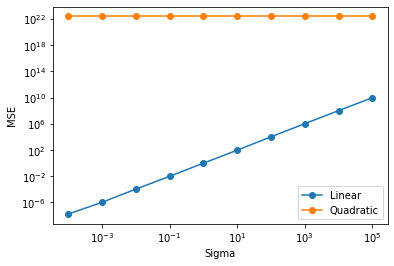

In [ ]:
def plot_mse():
  unif = np.random.uniform(-100, 101, 1000)
  X = []
  for val in unif:
    X.append([val])
  X = np.array(X)
  
  betas = np.array([122525252523, 952525258])
  alphas = np.array([72555256.3, 52525211.4])
  a = 10**-4
  sigmas = []
  while a <= 10**5:
    sigmas.append(a)
    a *= 10
  sigmas = np.array(sigmas)

  mse_linear = []
  mse_quad = []
  for sigma in sigmas:
    linear, quad = synthetic_datasets(betas, alphas, X, sigma)
    mse = list(compute_betas(linear, cols=[1]))[0]
    mse_linear.append(mse)
    mse = list(compute_betas(quad, cols=[1]))[0]
    mse_quad.append(mse)

  plt.xlabel('Sigma')
  plt.ylabel('MSE')
  plt.xscale("log")
  plt.yscale("log")
  plt.plot(sigmas, mse_linear, '-o', label = "Linear")
  plt.plot(sigmas, mse_quad, '-o',  label = "Quadratic")  
  plt.legend()
  plt.savefig("mse.pdf")

plot_mse() 